# Büchereien Wien's most frequently borrowed items in 2014 (Top 1000)

Source of the dataset: https://www.data.gv.at/katalog/de/dataset/stadt-wien_bchereienwienjahresbestleiher

In this notebook I want to explore the most popular books, CDs and DVDs in Vienna's public libraries: 

#### Introduction:
- Most popular authors: Who are the most borrowed authors based on the "Anzahl_Ausleihen" (Number of Checkouts) column?
- Popular titles: Which books ("Titel") have the highest number of checkouts?
- Media group distribution: What is the distribution of media types ("Mediengruppe") in the library? Which media group is borrowed the most? What are the most popular titles per media group?

#### Further analysis:
- Correlation between checkouts and titles: Is there a correlation between the number of checkouts and the number of titles an author has?
- Prolific Authors: Who are the most prolific authors in terms of the number of titles represented in the top 1000?
- Genre diversity of authors: Do authors tend to stick to a specific genre, or do they write across various genres? Which of their genres is more popular?
- Collaborations and series: Are there authors known for collaborations or for creating series of books? How do these perform compared to standalone titles?

#### Infering from names and titles:
- Which languages, apart from German, are most popular?
- Are there more female or male popular authors?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import numpy as np
# import geopandas as gpd
import os
# import folium
import langdetect
import gender_guesser.detector as gender

## Introduction

In [3]:
# I placed the file of the dataset and this Jupyter Notebook in the same folder, so I'm using the relative path in the following code 
bib = pd.read_csv("filervirtap4hat0001documents821_2014_bestleiher.csv", encoding="iso8859_15",sep=";")

bib.head(11)

,MEDIENNR,VERFASSERIN,TITEL,MEDIENGRUPPE,SYSTEMATIK,ANZAHL_AUSLEIHEN,ANZAHL_TITEL
0,1068688,"Kinney, Jeff",Geht's noch?,Buch,JE,1671,122
1,1097799,"Kinney, Jeff",Keine Panik!,Buch,JE,1658,116
2,971932,"Kinney, Jeff",Jetzt reicht's!,Buch,JE,1598,118
3,1013354,"Kinney, Jeff",Ich war's nicht!,Buch,JE,1518,109
4,920034,"Kinney, Jeff",Von Idioten umzingelt!,Buch,JE,1437,105
5,1152807,"Kinney, Jeff",Dumm gelaufen,Buch,JE,1382,99
6,938732,"Kinney, Jeff",Gibt's Probleme?,Buch,JE,1323,106
7,1198322,"Kinney, Jeff",Echt übel!,Buch,JE,1244,85
8,1068739,"Bornstädt, Matthias ¬von¬",Wickie wird entführt,Buch,JM.C,1074,76
9,1116806,"Bornstädt, Matthias ¬von¬",Wickie in der Klemme,Buch,JM.C,1072,78


In [4]:
# Making sure all my data has been read correctly

allrows_counts = bib["MEDIENNR"].count()
print (allrows_counts)

999


In [5]:
bib.dtypes 

MEDIENNR             int64
VERFASSERIN         object
TITEL               object
MEDIENGRUPPE        object
SYSTEMATIK          object
ANZAHL_AUSLEIHEN     int64
ANZAHL_TITEL         int64
dtype: object

In [6]:
# Removing special character '¬' from 'TITEL' column

bib['TITEL'] = bib['TITEL'].str.replace('¬', '')
bib.head(11)

,MEDIENNR,VERFASSERIN,TITEL,MEDIENGRUPPE,SYSTEMATIK,ANZAHL_AUSLEIHEN,ANZAHL_TITEL
0,1068688,"Kinney, Jeff",Geht's noch?,Buch,JE,1671,122
1,1097799,"Kinney, Jeff",Keine Panik!,Buch,JE,1658,116
2,971932,"Kinney, Jeff",Jetzt reicht's!,Buch,JE,1598,118
3,1013354,"Kinney, Jeff",Ich war's nicht!,Buch,JE,1518,109
4,920034,"Kinney, Jeff",Von Idioten umzingelt!,Buch,JE,1437,105
5,1152807,"Kinney, Jeff",Dumm gelaufen,Buch,JE,1382,99
6,938732,"Kinney, Jeff",Gibt's Probleme?,Buch,JE,1323,106
7,1198322,"Kinney, Jeff",Echt übel!,Buch,JE,1244,85
8,1068739,"Bornstädt, Matthias ¬von¬",Wickie wird entführt,Buch,JM.C,1074,76
9,1116806,"Bornstädt, Matthias ¬von¬",Wickie in der Klemme,Buch,JM.C,1072,78


In [7]:
# Removing special character '¬' from 'VERFASSERIN' column

bib['VERFASSERIN'] = bib['VERFASSERIN'].str.replace('¬', '')
bib.head(11)

,MEDIENNR,VERFASSERIN,TITEL,MEDIENGRUPPE,SYSTEMATIK,ANZAHL_AUSLEIHEN,ANZAHL_TITEL
0,1068688,"Kinney, Jeff",Geht's noch?,Buch,JE,1671,122
1,1097799,"Kinney, Jeff",Keine Panik!,Buch,JE,1658,116
2,971932,"Kinney, Jeff",Jetzt reicht's!,Buch,JE,1598,118
3,1013354,"Kinney, Jeff",Ich war's nicht!,Buch,JE,1518,109
4,920034,"Kinney, Jeff",Von Idioten umzingelt!,Buch,JE,1437,105
5,1152807,"Kinney, Jeff",Dumm gelaufen,Buch,JE,1382,99
6,938732,"Kinney, Jeff",Gibt's Probleme?,Buch,JE,1323,106
7,1198322,"Kinney, Jeff",Echt übel!,Buch,JE,1244,85
8,1068739,"Bornstädt, Matthias von",Wickie wird entführt,Buch,JM.C,1074,76
9,1116806,"Bornstädt, Matthias von",Wickie in der Klemme,Buch,JM.C,1072,78


In [8]:
# 10 Most popular items
top10items = bib[["ANZAHL_AUSLEIHEN", "TITEL", "VERFASSERIN"]].sort_values(by="ANZAHL_AUSLEIHEN", ascending=False).head(10)
print(top10items)

   ANZAHL_AUSLEIHEN                   TITEL              VERFASSERIN
0              1671            Geht's noch?             Kinney, Jeff
1              1658            Keine Panik!             Kinney, Jeff
2              1598         Jetzt reicht's!             Kinney, Jeff
3              1518        Ich war's nicht!             Kinney, Jeff
4              1437  Von Idioten umzingelt!             Kinney, Jeff
5              1382           Dumm gelaufen             Kinney, Jeff
6              1323        Gibt's Probleme?             Kinney, Jeff
7              1244              Echt übel!             Kinney, Jeff
8              1074    Wickie wird entführt  Bornstädt, Matthias von
9              1072    Wickie in der Klemme  Bornstädt, Matthias von


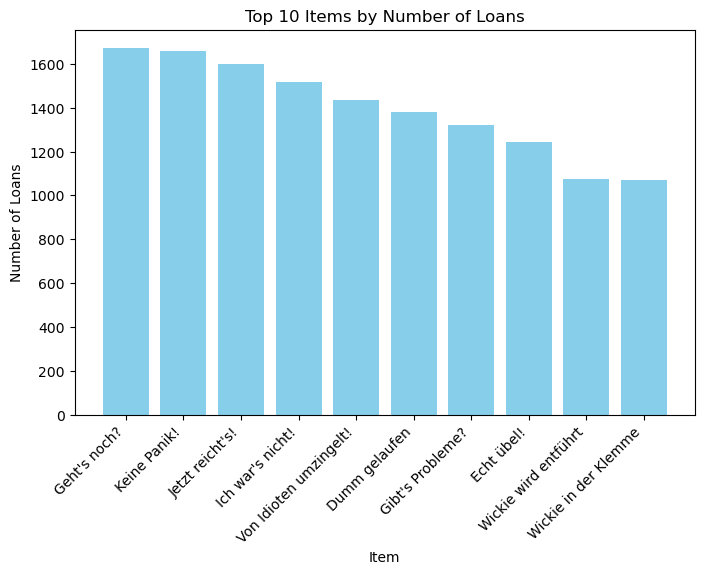

In [9]:
plt.figure(figsize=(8, 5))
plt.bar(top10items['TITEL'], top10items['ANZAHL_AUSLEIHEN'], color='skyblue')
plt.xlabel('Item')
plt.ylabel('Number of Loans')
plt.title('Top 10 Items by Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.show()

In [10]:
# 10 Most popular authors
top10authors = bib.groupby("VERFASSERIN")['ANZAHL_AUSLEIHEN'].sum().reset_index()
top10authors = top10authors.sort_values(by="ANZAHL_AUSLEIHEN", ascending=False).head(10)

print(top10authors)

               VERFASSERIN  ANZAHL_AUSLEIHEN
289     Osborne, Mary Pope             13394
353          Siegner, Ingo             13309
200           Kinney, Jeff             13172
179           Hunter, Erin             11758
392        Vogel, Maja von             11441
55          Chapman, Linda             10996
89           Dietl, Erhard             10834
285  Nöstlinger, Christine              8687
208                Knister              8124
37           Boehme, Julia              6381


In [11]:
print(type(top10authors))

<class 'pandas.core.frame.DataFrame'>


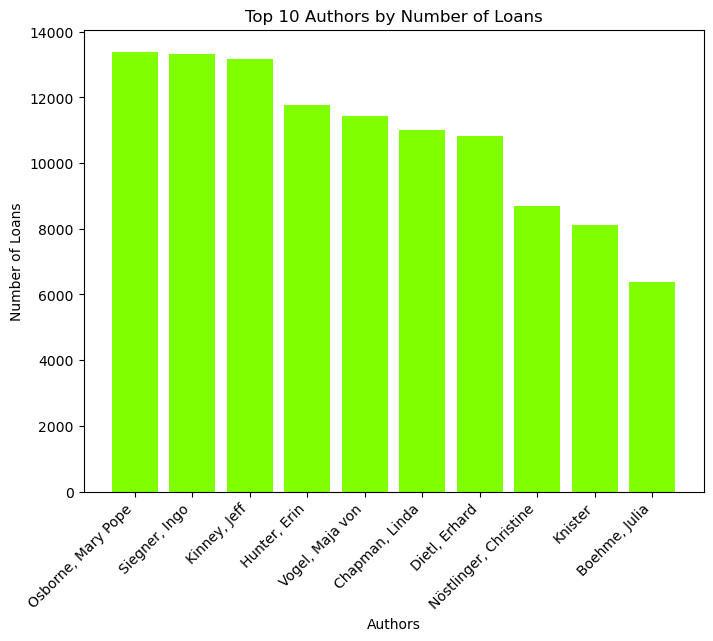

In [12]:
aggrtop10loans = bib.groupby("VERFASSERIN")['ANZAHL_AUSLEIHEN'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(top10authors['VERFASSERIN'], top10authors['ANZAHL_AUSLEIHEN'], color='chartreuse')
plt.xlabel('Authors')
plt.ylabel('Number of Loans')
plt.title('Top 10 Authors by Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.show()

In [13]:
# Which different types of items are available in public libraries?
mediumvc = bib.MEDIENGRUPPE.value_counts()
print (mediumvc)

MEDIENGRUPPE
Buch            934
DVD              54
Compact Disc     11
Name: count, dtype: int64


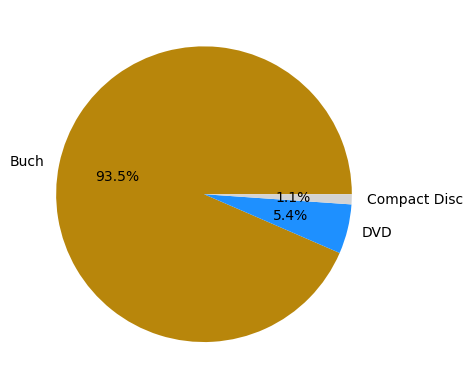

In [14]:
label_counts = bib['MEDIENGRUPPE'].value_counts()

unique_labels = label_counts.index
sizes = label_counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=unique_labels, autopct='%1.1f%%', colors=['darkgoldenrod', 'dodgerblue', 'lightgray'])
plt.show()

Books are the most popular medium, followed by DVDs and CDs.

In [15]:
top_items_by_group = bib.groupby('MEDIENGRUPPE').apply(lambda group: group.nlargest(3, 'ANZAHL_AUSLEIHEN')).reset_index(drop=True)

print(top_items_by_group)

   MEDIENNR     VERFASSERIN                                             TITEL  \
0   1068688    Kinney, Jeff                                      Geht's noch?   
1   1097799    Kinney, Jeff                                      Keine Panik!   
2    971932    Kinney, Jeff                                   Jetzt reicht's!   
3   1184089    Hunter, Erin                                       Mitternacht   
4   1044436    Hunter, Erin                                    In die Wildnis   
5   1194140   Siegner, Ingo  Der kleine Drache Kokosnuss bei den Dinosauriern   
6   1223494    Allen, Woody                                      Blue Jasmine   
7   1198384   August, Bille                            Nachtzug nach Lissabon   
8   1214243  Enrico, Jérôme                                          Paulette   

   MEDIENGRUPPE SYSTEMATIK  ANZAHL_AUSLEIHEN  ANZAHL_TITEL  
0          Buch         JE              1671           122  
1          Buch         JE              1658           116  
2     

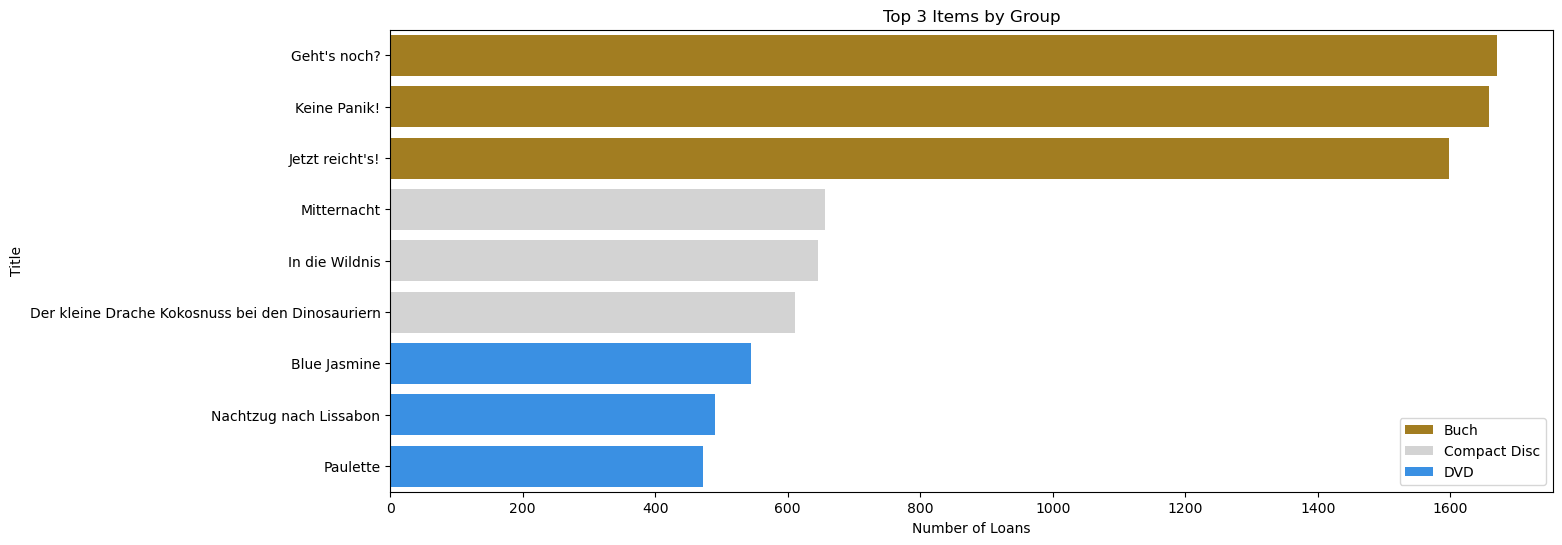

In [16]:
categories = top_items_by_group['MEDIENGRUPPE'].unique()

custom_colors = ['darkgoldenrod', 'lightgray', 'dodgerblue']

plt.figure(figsize=(15, 6))


for i, category in enumerate(categories):
    category_data = top_items_by_group[top_items_by_group['MEDIENGRUPPE'] == category]
    
    
    sns.barplot(x='ANZAHL_AUSLEIHEN', y='TITEL', data=category_data, color=custom_colors[i], label=category)

plt.legend(loc='lower right')

plt.title('Top 3 Items by Group')
plt.xlabel('Number of Loans')
plt.ylabel('Title')

plt.show()

In [17]:
ausleihmax = bib['ANZAHL_AUSLEIHEN'].max()
print(ausleihmax)

1671


In [18]:
ausleihmin = bib['ANZAHL_AUSLEIHEN'].min()
print(ausleihmin)

264


The book that was most often borrowed in 2014 was borrowed 1671 times. No popular book was borrowed less than 264 times.

In [19]:
ausleihmean_rounded = round(bib['ANZAHL_AUSLEIHEN'].mean())
print(ausleihmean_rounded)

388


On average, a book belonging to the top 1000 was borrowed 388 times.

# Languages

In [20]:
# This method is not reliable enough for short titles...

from langdetect import detect

titles = bib['TITEL']

# I create a new column 'detectedLANGUAGE' to store detected languages labels
bib['detectedLANGUAGE'] = titles.apply(lambda x: detect(x) if type(x) == str else None)

In [21]:
bib.head(21)

,MEDIENNR,VERFASSERIN,TITEL,MEDIENGRUPPE,SYSTEMATIK,ANZAHL_AUSLEIHEN,ANZAHL_TITEL,detectedLANGUAGE
0,1068688,"Kinney, Jeff",Geht's noch?,Buch,JE,1671,122,de
1,1097799,"Kinney, Jeff",Keine Panik!,Buch,JE,1658,116,et
2,971932,"Kinney, Jeff",Jetzt reicht's!,Buch,JE,1598,118,de
3,1013354,"Kinney, Jeff",Ich war's nicht!,Buch,JE,1518,109,de
4,920034,"Kinney, Jeff",Von Idioten umzingelt!,Buch,JE,1437,105,nl
5,1152807,"Kinney, Jeff",Dumm gelaufen,Buch,JE,1382,99,de
6,938732,"Kinney, Jeff",Gibt's Probleme?,Buch,JE,1323,106,ca
7,1198322,"Kinney, Jeff",Echt übel!,Buch,JE,1244,85,de
8,1068739,"Bornstädt, Matthias von",Wickie wird entführt,Buch,JM.C,1074,76,de
9,1116806,"Bornstädt, Matthias von",Wickie in der Klemme,Buch,JM.C,1072,78,de


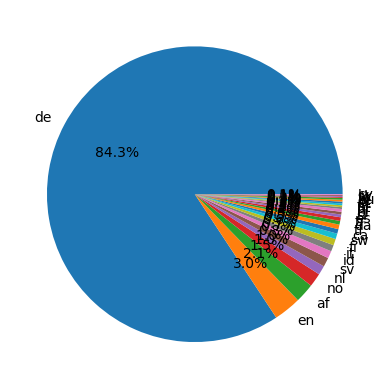

In [22]:
label_counts = bib['detectedLANGUAGE'].value_counts()

unique_labels = label_counts.index
sizes = label_counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=unique_labels, autopct='%1.1f%%')
plt.show()

Automated language detection is not reliable enough for short titles.

Luckily, Viennese public libraries sort their items based on categories that reveal the languages and the genre of items.

WIENER SYSTEMATIK FÜR ÖFFENTLICHE BÜCHEREIEN: https://buechereien.wien.gv.at/Portals/0/Files/Wiener_Systematik_f_Oeffentliche_Buechereien_01_2023.pdf

In [23]:
FS_rows = bib[bib['SYSTEMATIK'].str.startswith(('FS', 'FS.'))]
print(FS_rows)
count_FSrows = len(bib[bib['SYSTEMATIK'].str.startswith(('FS', 'FS.'))])
print(f"Number of rows with values starting with 'FS' or 'FS.': {count_FSrows}")

     MEDIENNR  VERFASSERIN          TITEL MEDIENGRUPPE SYSTEMATIK  \
980   1122338  Moyes, Jojo  Me before you         Buch       FS.E   

     ANZAHL_AUSLEIHEN  ANZAHL_TITEL detectedLANGUAGE  
980               266            28               en  
Number of rows with values starting with 'FS' or 'FS.': 1


There is only one book among the top 1000 books that is grouped under 'FOREIGN LANGUAGES' (FS = FREMDSPRACHIGE BÜCHER) by the public library. The book is "Me before you" by Jojo Moyes.

In [24]:
# Which SYSTEMATIK labels are represented in the top 1000?
systematikvc = bib.SYSTEMATIK.value_counts()
print (systematikvc)

SYSTEMATIK
DR.D      134
JM         83
DR         74
JE.C       74
JM.C       70
         ... 
DR.S        1
GE.OZ       1
EH.W        1
GE.HWO      1
JE.L        1
Name: count, Length: 108, dtype: int64


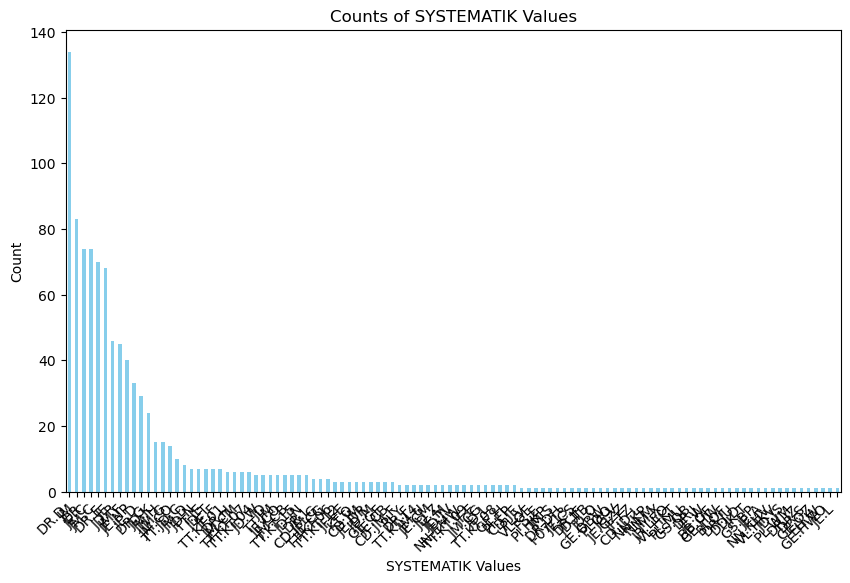

In [25]:
systematikvc = bib['SYSTEMATIK'].value_counts()

plt.figure(figsize=(10, 6))
systematikvc.plot(kind='bar', color='skyblue')
plt.title('Counts of SYSTEMATIK Values')
plt.xlabel('SYSTEMATIK Values')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Too much detail.

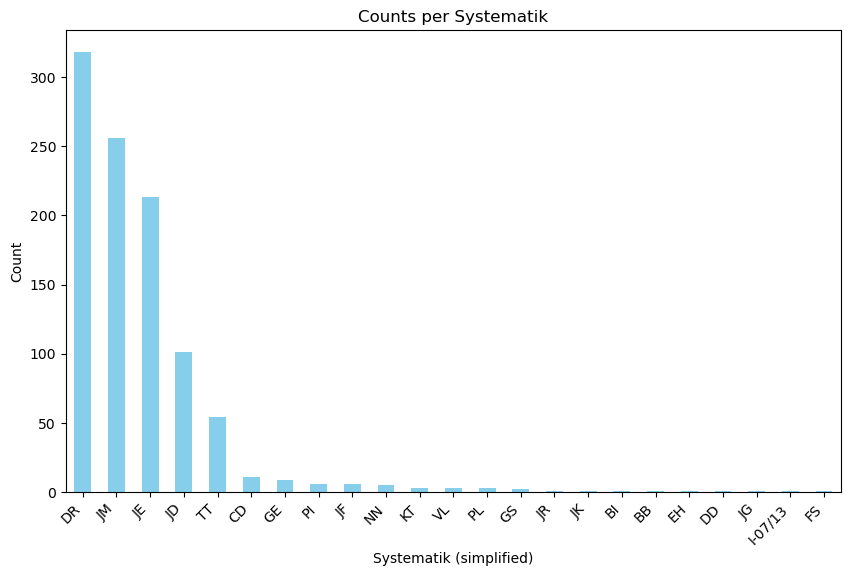

In [26]:
bib['simplifiedSYSTEMATIK'] = bib['SYSTEMATIK'].str.split('.').str[0] #creating a new column 'simplifiedSYSTEMATIK'

# For 'simplifiedSYSTEMATIK', I am extracting the part before the first dot of each value in the 'SYSTEMATIK' column, because the part after the dot is
# is used by the libraries to give more information/ a subgenre for a genre. For the above example FS.E, FS tells us that the book is a book in a foreign
# language (FremdSprache), .E reveals that this language is English.

simplifiedSYSTEMATIKvc = bib['simplifiedSYSTEMATIK'].value_counts()

plt.figure(figsize=(10, 6))
simplifiedSYSTEMATIKvc.plot(kind='bar', color='skyblue')
plt.title('Counts per Systematik')
plt.xlabel('Systematik (simplified)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The most popular genres are DR (novels, short stories, novellas), JM (fairy tales, legends, fantasy), JE (books for young readers), JD (picture books) and TT (DVDs).

In [27]:
bib.head(11) # with the added column

,MEDIENNR,VERFASSERIN,TITEL,MEDIENGRUPPE,SYSTEMATIK,ANZAHL_AUSLEIHEN,ANZAHL_TITEL,detectedLANGUAGE,simplifiedSYSTEMATIK
0,1068688,"Kinney, Jeff",Geht's noch?,Buch,JE,1671,122,de,JE
1,1097799,"Kinney, Jeff",Keine Panik!,Buch,JE,1658,116,et,JE
2,971932,"Kinney, Jeff",Jetzt reicht's!,Buch,JE,1598,118,de,JE
3,1013354,"Kinney, Jeff",Ich war's nicht!,Buch,JE,1518,109,de,JE
4,920034,"Kinney, Jeff",Von Idioten umzingelt!,Buch,JE,1437,105,nl,JE
5,1152807,"Kinney, Jeff",Dumm gelaufen,Buch,JE,1382,99,de,JE
6,938732,"Kinney, Jeff",Gibt's Probleme?,Buch,JE,1323,106,ca,JE
7,1198322,"Kinney, Jeff",Echt übel!,Buch,JE,1244,85,de,JE
8,1068739,"Bornstädt, Matthias von",Wickie wird entführt,Buch,JM.C,1074,76,de,JM
9,1116806,"Bornstädt, Matthias von",Wickie in der Klemme,Buch,JM.C,1072,78,de,JM


In [28]:
# Creating the gender detector
d = gender.Detector()


def get_gender(name):
    # we only want the first name after the comma
    parts = name.split(',')
    
    # using the second part of the split
    firstname = parts[1].strip() if len(parts) > 1 else parts[0].strip()
    
    return d.get_gender(firstname)

# Creating a new 'guessedGender' column
bib['guessedGender'] = bib['VERFASSERIN'].apply(get_gender)

In [29]:
guessedGendervc = bib['guessedGender'].value_counts()

print(guessedGendervc)

# 'andy' stands for 'androgynous'

guessedGender
male             406
female           368
unknown          177
mostly_female     32
mostly_male       11
andy               5
Name: count, dtype: int64


My firstname doesn't take names such as 'Bornstädt, Matthias von' into account. This might explain the relatively high number of unknown names. 

I now want to get all elements in the VERFASSERIN column, where there is more than one blank space. This should give me all authours with multiple first names and names with nobiliary particle such as 'von' or 'del'.

In [30]:
unknown = bib[bib['guessedGender'] == 'unknown']['VERFASSERIN']

print(unknown)

8      Bornstädt, Matthias von
9      Bornstädt, Matthias von
10     Bornstädt, Matthias von
12     Schirach, Ferdinand von
15             Vogel, Maja von
                ...           
938         Osborne, Mary Pope
965         Forester, Cecil S.
975         Osborne, Mary Pope
980                Moyes, Jojo
986            Vogel, Maja von
Name: VERFASSERIN, Length: 177, dtype: object


In [31]:
# all elements in the VERFASSERIN where there is a total of more than one blank space ' '

difficultnames = bib[bib['VERFASSERIN'].str.count(' ') > 1]['VERFASSERIN']

print(difficultnames)

8      Bornstädt, Matthias von
9      Bornstädt, Matthias von
10     Bornstädt, Matthias von
12     Schirach, Ferdinand von
15             Vogel, Maja von
                ...           
937            Vogel, Maja von
938         Osborne, Mary Pope
965         Forester, Cecil S.
975         Osborne, Mary Pope
986            Vogel, Maja von
Name: VERFASSERIN, Length: 138, dtype: object


In [32]:
# better way to filter first names: firstname as the part of the string in VERFASSERIN that comes in between ', ' and ' '
# The code now uses the first part of the split after the comma (', '), then splits it again by space (' '), and takes the first element to get the first
# name.

def get_gender(name):
    parts = name.split(', ')
    firstname = parts[1].split(' ')[0] if len(parts) > 1 else parts[0].strip()
    
    return d.get_gender(firstname)

# updating 'guessedGender'
bib['guessedGender'] = bib['VERFASSERIN'].apply(get_gender)

In [33]:
unknownvc = bib[bib['guessedGender'] == 'unknown']['VERFASSERIN'].count()
print(unknownvc)

50


Before, there were 177 names with unknown gender. Now, there are only 50 such cases.

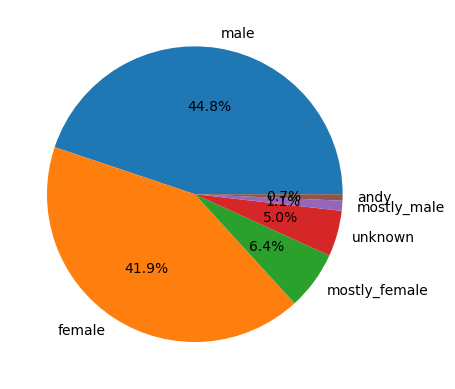

In [34]:
label_counts = bib['guessedGender'].value_counts()

unique_labels = label_counts.index
sizes = label_counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=unique_labels, autopct='%1.1f%%')
plt.show()

In [36]:
mostly_female = bib[bib['guessedGender'] == 'mostly_female']['VERFASSERIN'].value_counts()

print(mostly_female)

# Every author here except for Jamie Oliver is indeed female. 

VERFASSERIN
Osborne, Mary Pope     30
Hunter, Erin           26
Clark, Mary Higgins     2
Oliver, Jamie           1
McDermid, Val           1
Child, Lauren           1
Weisberger, Lauren      1
Baeten, Lieve           1
McCreight, Kimberly     1
Name: count, dtype: int64


In [37]:
mostly_male = bib[bib['guessedGender'] == 'mostly_male']['VERFASSERIN'].value_counts()

print(mostly_male)

# Every author here except for Mo Hayder is indeed male.

VERFASSERIN
Child, Lee           3
Murakami, Haruki     2
Buck, Chris          1
Hayder, Mo           1
Daniels, Lee         1
Pratchett, Terry     1
Delafosse, Claude    1
Raimi, Sam           1
Name: count, dtype: int64


In [40]:
female = bib[(bib['guessedGender'] == 'mostly_female') | (bib['guessedGender'] == 'female')]['VERFASSERIN']

print(female)

11        Hunter, Erin
13        Hunter, Erin
15     Vogel, Maja von
16         Leon, Donna
18     Vogel, Maja von
            ...       
993       Sten, Viveca
994    Gehm, Franziska
996      Boehme, Julia
997       Rübel, Doris
998    Gehm, Franziska
Name: VERFASSERIN, Length: 483, dtype: object


In [41]:
male = bib[(bib['guessedGender'] == 'mostly_male') | (bib['guessedGender'] == 'male')]['VERFASSERIN']

print(male)

0            Kinney, Jeff
1            Kinney, Jeff
2            Kinney, Jeff
3            Kinney, Jeff
4            Kinney, Jeff
              ...        
988         Jarmusch, Jim
989            Coen, Joel
991      Bertram, Rüdiger
992    Dreller, Christian
995          Landy, Derek
Name: VERFASSERIN, Length: 459, dtype: object
